## Setup:

In [1]:
import pandas as pd
import numpy as np

from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
file_path = 'Auto Claims.csv'
auto_claims_data = pd.read_csv(file_path)

# Convert categorical variables using label encoding
label_encoder = LabelEncoder()
auto_claims_data['Vehicle Make'] = label_encoder.fit_transform(auto_claims_data['Vehicle Make'])
auto_claims_data['Vehicle Model'] = label_encoder.fit_transform(auto_claims_data['Vehicle Model'])

# Convert dates to ordinal numbers
auto_claims_data['Date of Accident'] = pd.to_datetime(auto_claims_data['Date of Accident']).apply(lambda x: x.toordinal())
auto_claims_data['Date of Claim'] = pd.to_datetime(auto_claims_data['Date of Claim']).apply(lambda x: x.toordinal())

# Assume 'Claim Status' is the target variable and it is binary
y = auto_claims_data['Claim Status'].apply(lambda x: 1 if x == 'Approved' else 0)
X = auto_claims_data.drop('Claim Status', axis=1)

# Scale the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a simple neural network model for binary classification
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
3/3 [==============================] - 2s 220ms/step - loss: 0.6589 - accuracy: 0.6528 - val_loss: 0.7151 - val_accuracy: 0.6250
Epoch 2/10
3/3 [==============================] - 0s 34ms/step - loss: 0.6476 - accuracy: 0.6528 - val_loss: 0.7160 - val_accuracy: 0.6250
Epoch 3/10
3/3 [==============================] - 0s 37ms/step - loss: 0.6406 - accuracy: 0.6528 - val_loss: 0.7156 - val_accuracy: 0.6250
Epoch 4/10
3/3 [==============================] - 0s 44ms/step - loss: 0.6348 - accuracy: 0.6528 - val_loss: 0.7108 - val_accuracy: 0.6250
Epoch 5/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6311 - accuracy: 0.6528 - val_loss: 0.7069 - val_accuracy: 0.6250
Epoch 6/10
3/3 [==============================] - 0s 32ms/step - loss: 0.6257 - accuracy: 0.6528 - val_loss: 0.7028 - val_accuracy: 0.6250
Epoch 7/10
3/3 [==============================] - 0s 122ms/step - loss: 0.6217 - accuracy: 0.6528 - val_loss: 0.6995 - val_accuracy: 0.6250
Epoch 8/10
3/3 [=========

## Loss Curves:

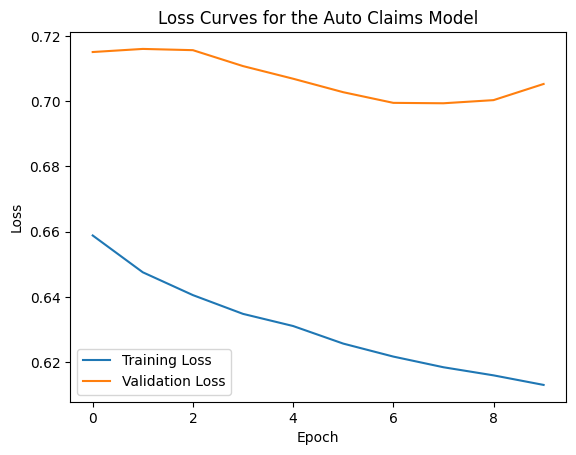

In [3]:
# Plot the loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Loss Curves for the Auto Claims Model')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Interpretation and Considerations:

- **Training Loss (Blue Line):** The training loss steadily decreases as the number of epochs increases, which is a positive sign. It indicates that the model is learning from the training data and improving its predictions over time.

- **Validation Loss (Orange Line):** The validation loss initially decreases but then starts to increase slightly as training progresses. This could be a sign of overfitting, where the model performs well on the training data but less so on unseen validation data.

- **Early Stopping Point:** Since the validation loss stops improving after a certain number of epochs, this might be the point where we would stop training to prevent overfitting. Techniques like early stopping would automatically stop the training process when the validation loss fails to improve.

- **Gap Between Curves:** The gap between the training and validation loss indicates how well the model generalizes from the training data to unseen data. A small gap is ideal, but here the gap is widening as the epochs increase, which again points towards potential overfitting.

- In summary, the model appears to be learning effectively, as indicated by the decreasing training loss.

- The increasing validation loss after an initial decrease suggests that the model's ability to generalize is not improving after a certain point. This would be a good time to consider adjusting model complexity, or gathering more diverse training data to improve the model's generalization capabilities.

## Confusion Matrix:

1/1 [==============================] - 0s 283ms/step


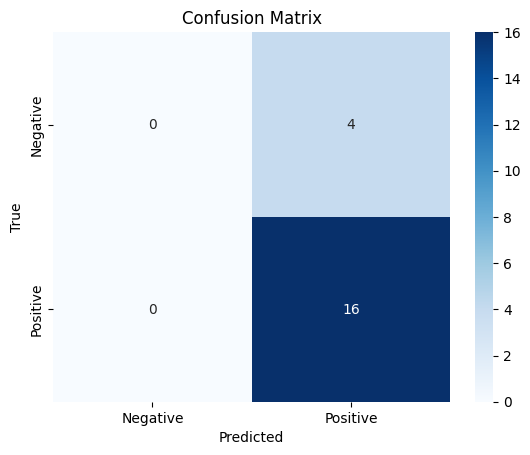

In [4]:
# Get the predicted probabilities for the positive class
y_probs = model.predict(X_test)

# Convert probabilities to class predictions using a 0.5 threshold
y_pred = (y_probs > 0.5).astype('int32')

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
# (optional) Set the labels for the classes
class_labels = ['Negative', 'Positive']
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Interpretation and Considerations:

The confusion matrix indicates the following results:

- **True Negatives (TN):** The top-left cell shows the number of negative cases (e.g., 'Rejected' claims) that were correctly identified as negative by the model. The number is 0, indicating that the model did not correctly predict any of the negative cases.

- **False Negatives (FN):** The top-right cell shows the number of positive cases (e.g., 'Approved' claims) that were incorrectly predicted as negative by the model. The number is 4, indicating that there are 4 'Approved' claims that the model incorrectly predicted as 'Rejected'.

- **False Positives (FP):** The bottom-left cell shows the number of negative cases that were incorrectly predicted as positive by the model. The number is 0, indicating that the model did not incorrectly predict any 'Rejected' claims as 'Approved'.

True Positives (TP): The bottom-right cell shows the number of positive cases that were correctly predicted as positive by the model. The number is 16, indicating that the model correctly identified 16 'Approved' claims.

Given this confusion matrix, we can derive the following metrics:

Accuracy:
�
�
+
�
�
�
�
+
�
�
+
�
�
+
�
�
=
16
+
0
16
+
0
+
4
+
0
=
16
20
=
0.8
TP+FP+FN+TN
TP+TN
​
 =
16+0+4+0
16+0
​
 =
20
16
​
 =0.8 or 80%

Precision:
�
�
�
�
+
�
�
=
16
16
+
0
=
1
TP+FP
TP
​
 =
16+0
16
​
 =1 or 100%. This means that when the model predicts an 'Approved' claim, it is correct every time.

Recall:
�
�
�
�
+
�
�
=
16
16
+
4
=
16
20
=
0.8
TP+FN
TP
​
 =
16+4
16
​
 =
20
16
​
 =0.8 or 80%. This means that out of all the 'Approved' claims, the model is able to identify 80% correctly.

F1 Score:
2
×
�
�
�
�
�
�
�
�
�
×
�
�
�
�
�
�
�
�
�
�
�
�
�
�
�
+
�
�
�
�
�
�
=
2
×
1
×
0.8
1
+
0.8
=
1.6
1.8
≈
0.89
2×
Precision+Recall
Precision×Recall
​
 =2×
1+0.8
1×0.8
​
 =
1.8
1.6
​
 ≈0.89 or 89%. The F1 score is the harmonic mean of precision and recall, providing a single measure for the balance between the two.

These results suggest that while the model is very precise in its positive predictions (no false positives), it has missed some positive cases (false negatives), leading to a recall of 80%. The absence of true negatives and false positives suggests that the model may be biased towards predicting the positive class, or it's possible that there were no negative cases in the test set.

In practice, for an auto claims processing scenario, this could mean the model is very cautious about rejecting claims, preferring to err on the side of approving. Depending on the business implications, this could either be a desirable trait (if the cost of rejecting legitimate claims is high) or an area for improvement (if unwarranted claim approvals are costly).

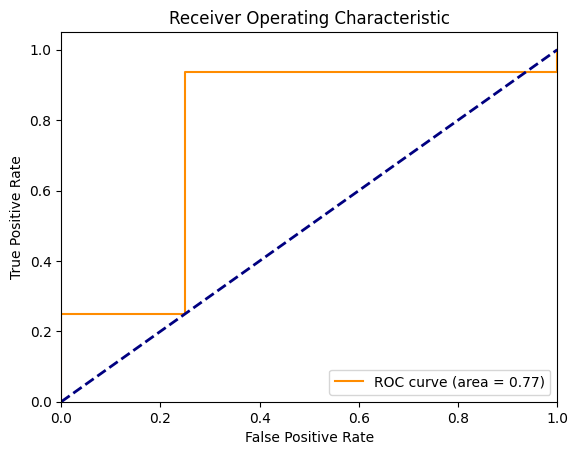

In [5]:
# Calculate the FPR and TPR for various thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

The image you've uploaded appears to be a Receiver Operating Characteristic (ROC) curve for your model with an Area Under Curve (AUC) of 0.77.

Here's how to interpret the ROC curve and AUC value:

ROC Curve: It plots the True Positive Rate (TPR, also known as recall) against the False Positive Rate (FPR) at various threshold settings. The TPR is on the y-axis, and the FPR is on the x-axis.

True Positive Rate (TPR): Indicates what proportion of the positive class (e.g., 'Approved' claims) was correctly identified by the model over all positive instances in the dataset.

False Positive Rate (FPR): Indicates what proportion of the negative class (e.g., 'Rejected' claims) was incorrectly identified as positive over all negative instances in the dataset.

AUC Value (0.77): The AUC provides a single measure of the model's performance across all classification thresholds. An AUC of 1 would indicate a perfect model, while an AUC of 0.5 suggests a model that does no better than random guessing. An AUC of 0.77 suggests that the model has a good measure of separability and is able to distinguish between the positive and negative classes fairly well. However, there is still room for improvement.

Curve Shape: The curve sharply rises towards the top-left corner, which indicates a good true positive rate when the false positive rate is low. This is typically what you want to see. The curve then runs along the y-axis, which suggests that the model can achieve high recall without increasing the false positive rate, up to a point.

In the context of your auto insurance claims dataset, this ROC curve indicates that your model is quite effective at distinguishing between claims that should be approved versus those that should be rejected, with a tendency to favor recall over precision.

The AUC of 0.77 is generally considered good, and it shows that your model has a good balance between sensitivity (identifying all approved claims) and specificity (not misclassifying rejected claims as approved). However, depending on the business context, you may wish to adjust the model to reduce the number of false positives or false negatives.

For example, in an insurance claim scenario:

A high false positive rate might mean that too many claims are being approved when they should not be, potentially costing the company money.
A high false negative rate might mean that legitimate claims are being rejected, which could lead to customer dissatisfaction.
You would choose the model threshold that balances these considerations according to your business objectives.